# Atomic Orbitals

\begin{equation}
{\cal H}\Psi(x) =\left[ -\frac{\hbar}{2 m} \nabla^2 - \frac{Z e^2}{4 \pi \epsilon_0 r}\right]\Psi(x) = E \Psi(x)
\end{equation}

\begin{equation}
\nabla^2= \frac{1}{r^2}\frac{\partial}{\partial r} \left(
r^2 \frac{\partial}{\partial r}
\right)+ 
\frac{1}{r^2 \sin \theta} \frac{\partial}{\partial \theta} \left(
\sin \theta \frac{\partial}{\partial \theta}
\right)+
\frac{1}{r^2 \sin^2 \theta} \frac{\partial^2}{\partial \phi^2}
\end{equation}



In [6]:
#Pkg.update();
#Pkg.add("GSL");
#Pkg.add("PyPlot");
using GSL;
using PyPlot;

\begin{equation}
    \rho=\frac{2r}{n a_0}
\end{equation}

\begin{equation}
        Y^m_l(θ,ϕ) = (-1)^m e^{i m \phi} P^m_l (\cos(θ))
\end{equation}
where $P^m_l (\cos (\theta))$ is the associated Legendre Polynomial.

\begin{equation}
    R^{n,l} (\rho) = \rho^l e^{-\rho/2} L^{2 l+1}_{n-l-1} (\rho)
\end{equation}
where $L^{2 l+1}_{n-l-1}(\rho)$ is the generalized Laguerre polynomial.  

\begin{equation}
    N=\sqrt{\left(\frac{2}{n}\right)^3 \frac{(n-l-1)}{2n(n+l)!}}
\end{equation}

In [8]:
a0=1; #for convenience, or 5.2917721092(17)×10−11 m

ρ(r,n)=2r/(n*a0);

function Yml(m::Int,l::Int,θ::Real,ϕ::Real)
    return  (-1)^m*sf_legendre_Plm(l,m,cos(θ))*e^(im*m*ϕ)
end

function Pmlh(m::Int,l::Int,θ::Real)
    return (-1)^m *sf_legendre_Plm(l,m,cos(θ)); 
end

function R(n::Int,l::Int,ρ::Real)
     return sf_laguerre_n(n-l-1,2*l+1,ρ)*e^(-ρ/2)*ρ^l
end

function norm(n::Int,l::Int)
    return sqrt((2/n)^3 * factorial(n-l-1)/(2n*factorial(n+l)))
end
"Defined Helper Functions"

"Defined Helper Functions"

#### <b>Programming Tip!</b>
Even though its not necessary, specifying the type of inputs to a function through `m::Int` helps prevent improper inputs and allows the compiler to perform additional optimizations.  Julia also implements <i>Abstract Types</i>, so we don't have to specify the exact type of Int.  Real allows and numerical, non-complex type.  

Type greek characters in Jupyter notebooks via LaTeX syntax.  ex: \alpha+tab

In [34]:
r=collect(linspace(.05,5,100));
ϕ=collect(linspace(0,2π,100));
θ=collect(linspace(0,π,100));

In [35]:
lr=length(r);
lϕ=length(ϕ);
lθ=length(θ);
ra=repeat(r,outer=[1,lϕ,lθ]);
ϕa=repeat(transpose(ϕ),outer=[lr,1,lθ]);
θa=repeat(reshape(θ,1,1,lθ),outer=[lr,lϕ,1]);

In [26]:
θ[1], θ[end]

(0.0,3.1415926535897936)

In [36]:
function SphtoCart(r::Array,θ::Array,ϕ::Array)
    x=r.*sin(θ).*cos(ϕ);
    y=r.*sin(θ).*sin(ϕ);
    z=r.*cos(θ);
    return x,y,z;
end
x,y,z=SphtoCart(ra,θa,ϕa);

In [37]:
n=3;
l=1;
m=0;
Ψ=zeros(Float64,lr,lϕ,lθ)
ϕd=Int64(round(lϕ/2))

p1=Pmlh(m,l,θ[1]);
p2=exp(im*m*ϕ[1]);
for i in 1:lr
    Ψ[i,1,1]=norm(n,l)*R(n,l,ρ(r[i],n))*p1*p2;
end

for j in 1:lθ
    Ψ[:,1,j]=Ψ[:,1,1]*Pmlh(m,l,θ[j])/p1;
end

for k in 1:lϕ
    Ψ[:,k,:]=Ψ[:,1,:]*exp(im*m*ϕ[k])/p2;
end

In [101]:
θa[50,:,50]

1x100 Array{Float64,2}:
 1.55493  1.55493  1.55493  1.55493  …  1.55493  1.55493  1.55493  1.55493

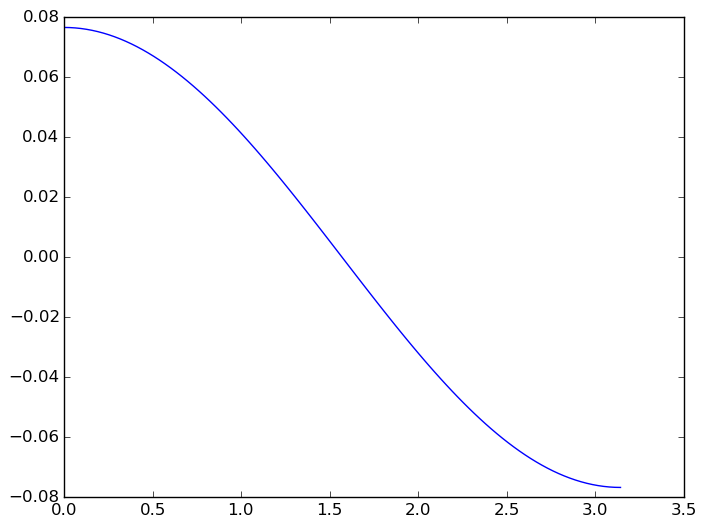

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fe7a8250f10>

In [104]:
pygui(false)
plot(θ,reshape(Ψ[50,1,:],100))

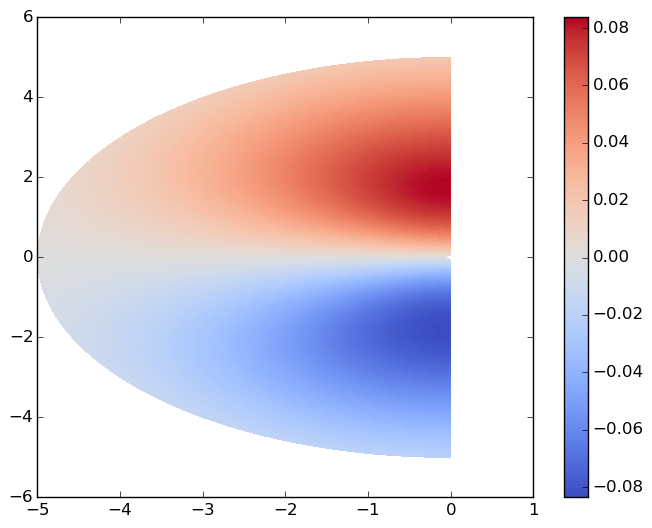

PyObject <matplotlib.colorbar.Colorbar instance at 0x7fe7ab063248>

In [82]:
rap=squeeze(ra[:,50,:],2)
θap=squeeze(θa[:,50,:],2)
ϕap=squeeze(ϕa[:,50,:],2)
xp,yp,zp=SphtoCart(rap,θap,ϕap);
pygui(false)
pcolor(xp[:,:],zp[:,:],Ψp[:,:],cmap="coolwarm")
colorbar()

In [ ]:
pygui(false)
contour(x[:,:,ϕd],y[:,:,ϕd],Ψ[:,:,ϕd])

pygui(false)
surf(x[:,:,ϕd],y[:,:,ϕd],Ψ[:,:,ϕd],linewidth=0,antialiased=false,cmap=ColorMap("cool"))